# Signal Processing Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

## Exercise

Generate a 10-second random signal with 0.01-second sampling interval and plot it. (Tip: you should use [`np.random.random()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html))

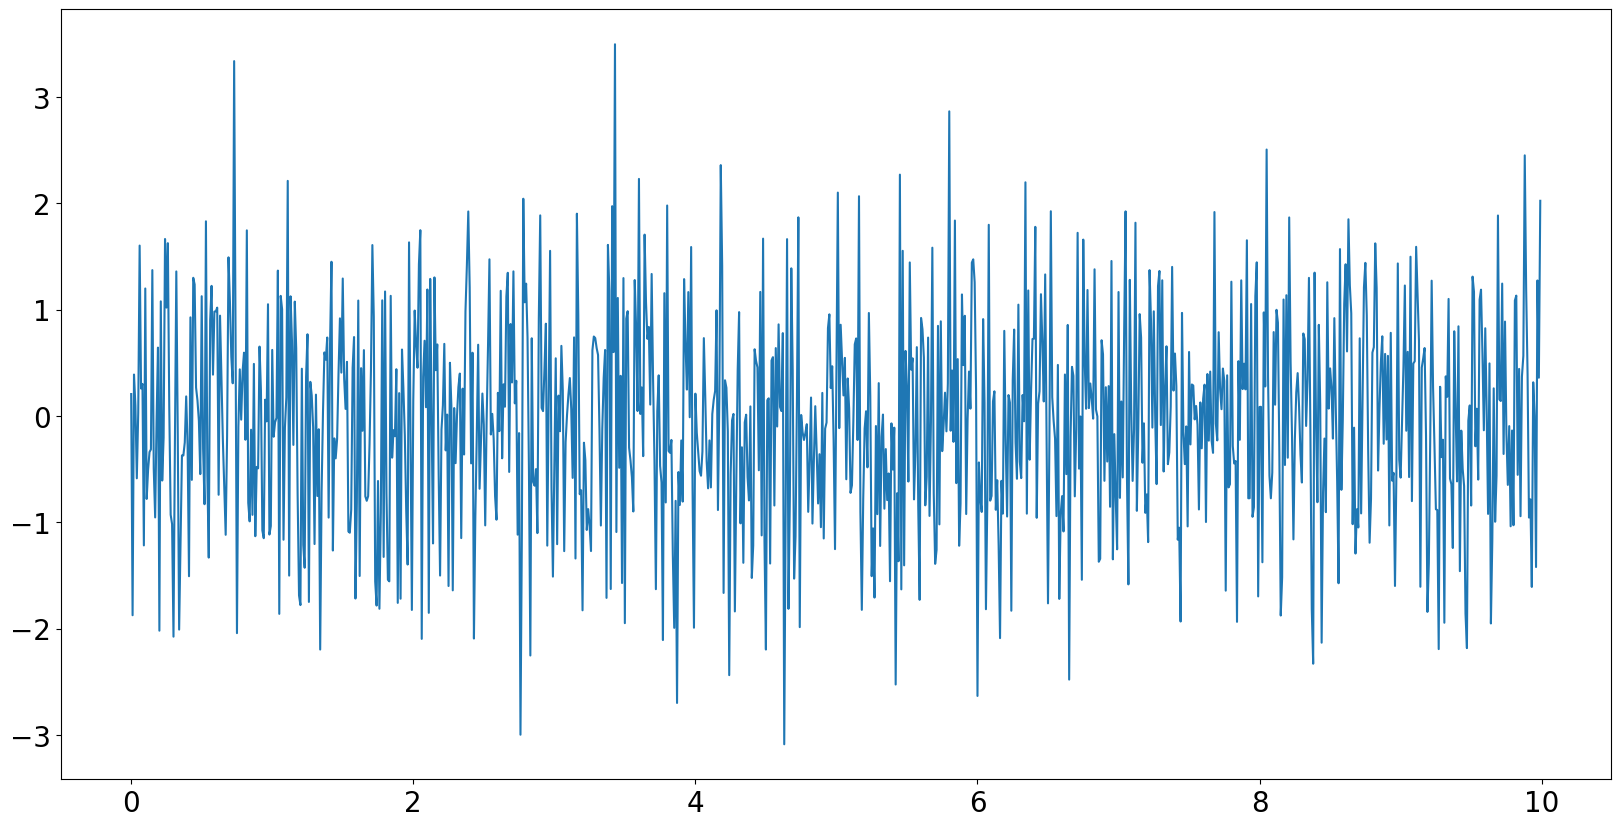

In [9]:
y = np.random.randn(1000)
t = np.arange(0, 1000, 1) / 100

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(t, y)

**Question**

Is the signal continuous or discrete? Analog or digital?

> Answer: discrete and digital. There is only a finite number of samples and the values are quantized (as float32)

## ECG Example
The file `ecg.txt` contains 15,000 electrocardiogram data points, sampled at 1,000 Hz. Plot the signal with the appropriate time axis.

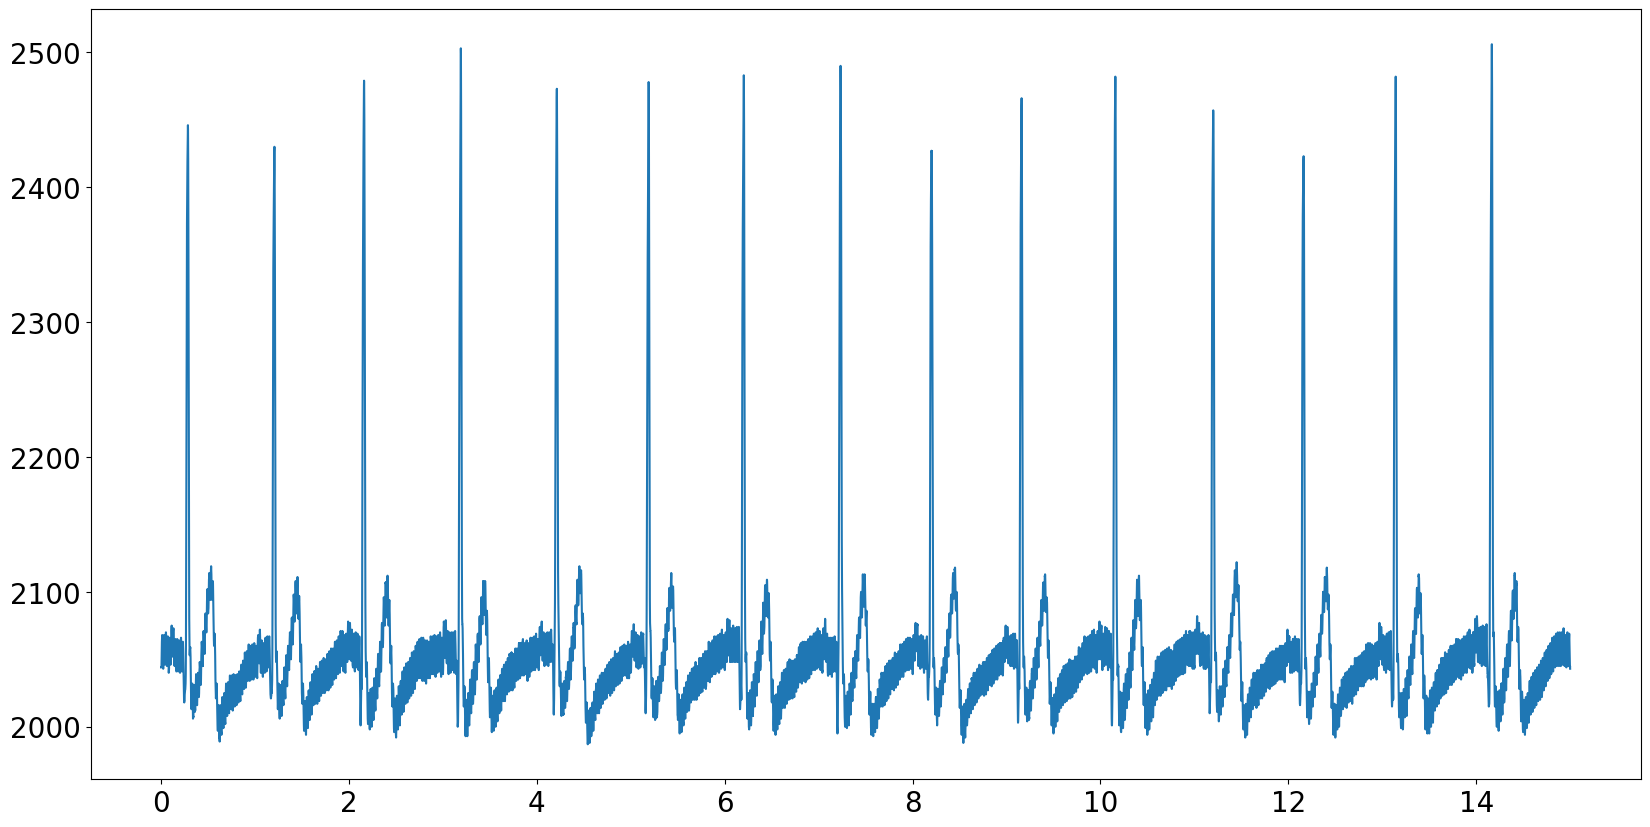

In [10]:
ecg_url = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/ecg.txt"
ecg_microvolts = np.loadtxt(ecg_url, skiprows=4)
ecg_seconds = np.linspace(0, len(ecg_microvolts) / 1000, len(ecg_microvolts))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(ecg_seconds, ecg_microvolts)

**Question**

Estimate the frequency and amplitude of the above ECG signal—NOT using code!

> Answer: About 1hz and the amplitude is about 2450

### Exercise #1

Generate and plot a sinusoidal signal with frequency 0.2 HZ and amplitude of 1.5.

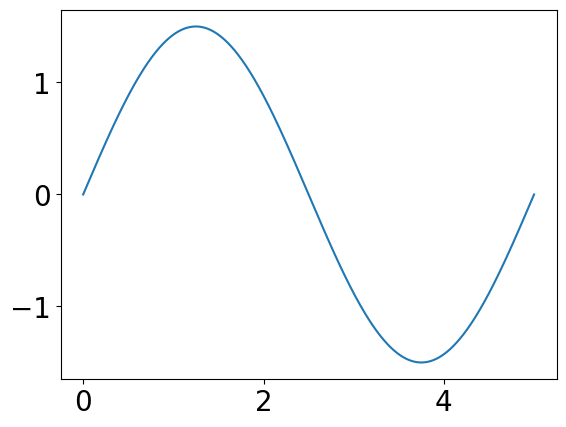

In [15]:
t = np.linspace(0, 5, 1000)
y = np.sin(t * 0.2 * 2 * np.pi) * 1.5

plt.plot(t, y)

### Exercise #2

Consider the signal shown below (the sum of two sinusoids) for this question. How many points do you need in your subsample to completely determine the signal? What frequencies do you have in your signal?

(-2.0, 2.0)

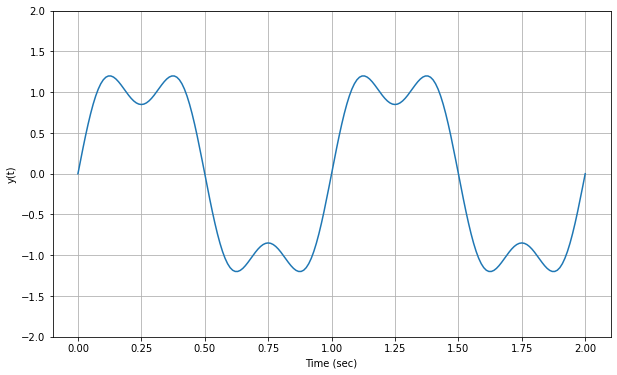

In [ ]:
t = np.linspace(0, 2, 201)
y = (4 / np.pi) * np.sin(2 * np.pi * t) + (4 / (3 * np.pi)) * np.sin(6 * np.pi * t)

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.xlabel("Time (sec)")
plt.ylabel("y(t)")
plt.grid()
plt.ylim([-2, 2])

> Answer: 6. The max freq is 3, and by Nyquist theorem, we need at least 2x the max freq to completely determine the signal.

### Exercise #3

Plot the peaks from the ECG signal. You can take a look at `scipy.signal`'s documentation for [`find_peaks()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html).

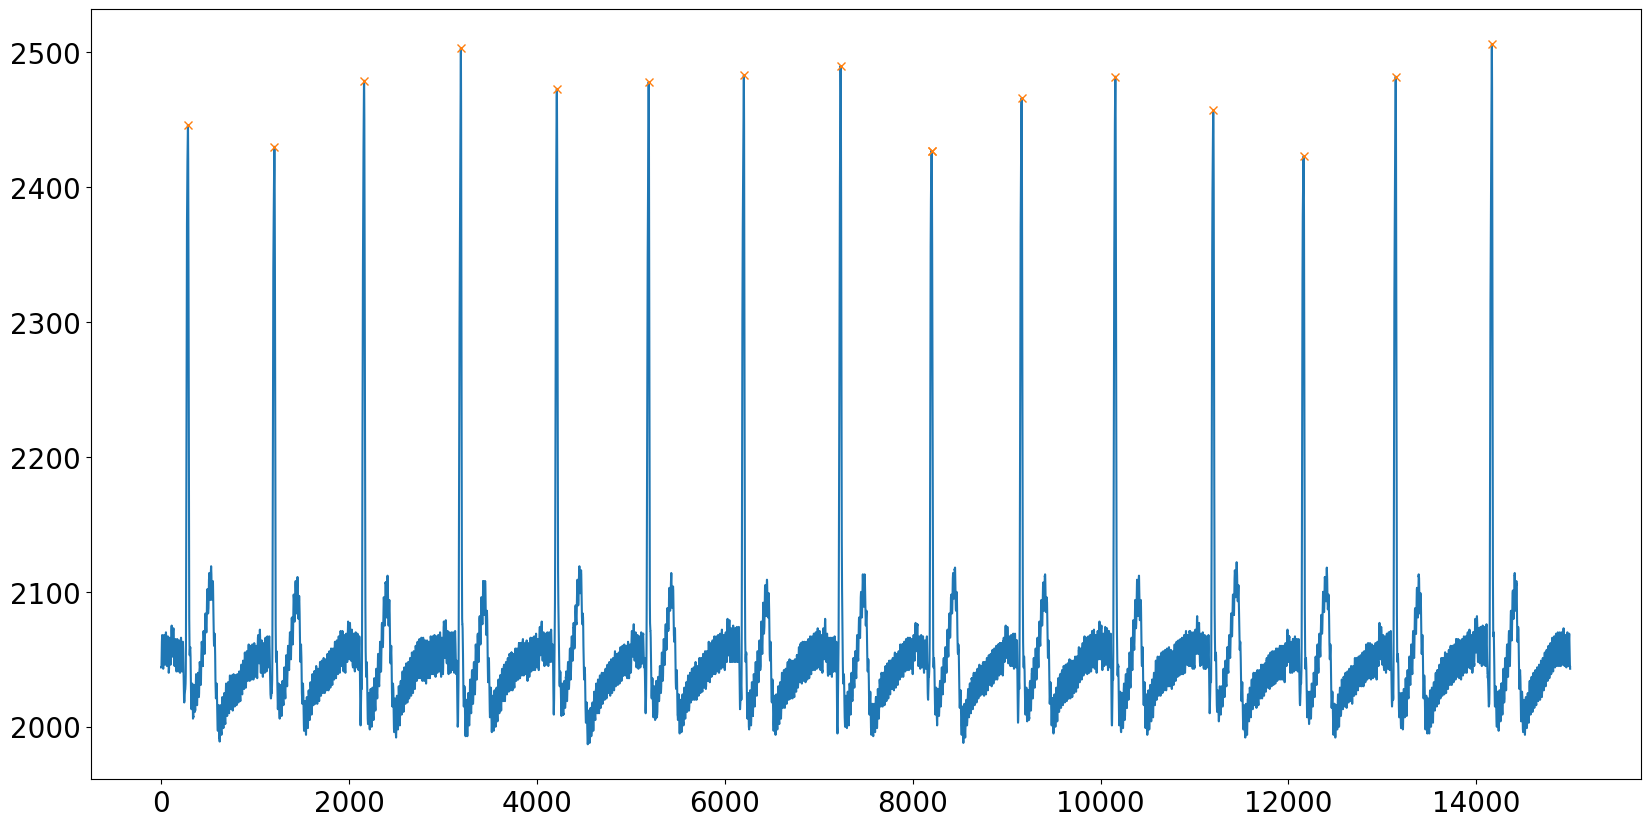

In [17]:
# Load the ECG example data
ecg_url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/ecg.txt'
ecg_microvolts = np.loadtxt(ecg_url,skiprows=4)

# Import the `find_peaks` function
from scipy.signal import find_peaks

peaks = find_peaks(ecg_microvolts, height=2400)[0]
plt.figure(figsize=(20, 10))
plt.plot(ecg_microvolts)
plt.plot(peaks, ecg_microvolts[peaks], 'x')

### Exercise #4

1. Generate 5 sine waves with frequencies and amplitudes set based on 2 user-defined lists, then sum them into one signal.
2. Plot the 5 original sine waves and the combined signal.
3. Plot **x** markers at the peaks of the waves using `find_peaks`.

Text(0, 0.5, 'y(t)')

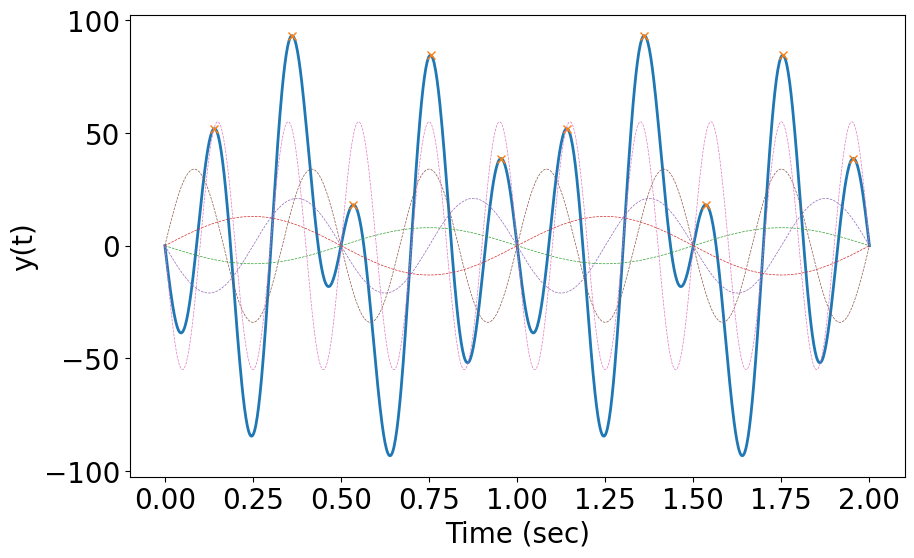

In [26]:
freqs, amps = [1, 1, 2, 3, 5], [-8, 13, -21, 34, -55]
t = np.linspace(0, 2, 1000)
signals = [np.sin(2 * np.pi * freq * t) * amp for freq, amp in zip(freqs, amps)]
y = sum(signals)
peaks = find_peaks(y, height=10)[0]


plt.figure(figsize=(10, 6))
plt.plot(t, y, lw=2)
plt.plot(t[peaks], y[peaks], 'x')

for signal in signals:
    plt.plot(t, signal, "--", lw=0.5)

plt.xlabel("Time (sec)")
plt.ylabel("y(t)")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2703ed7-f8b4-40f5-8dd1-77fe823e4d60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>